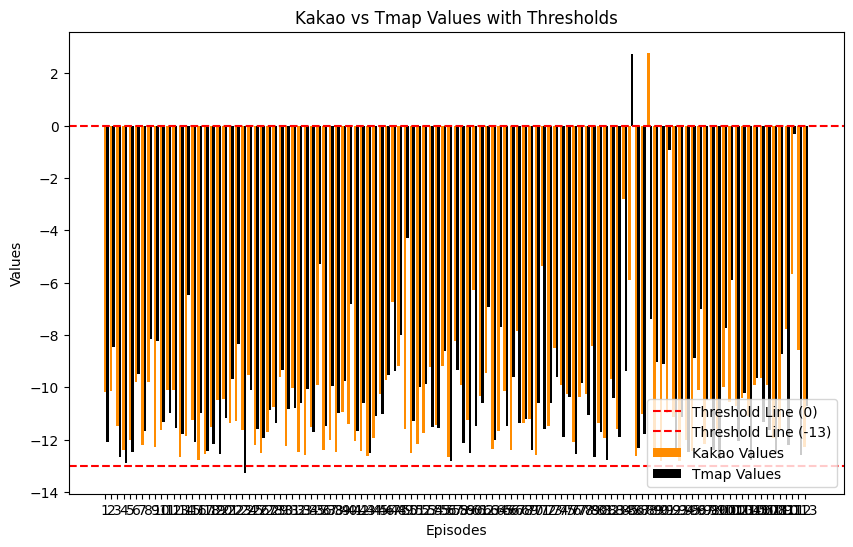

Total Episodes: 113

Kakao Data:
    In range: 112
    Early Arrival: 0
    Late Arrival: 1
    Avg # of API call: 6.991150442477876
    Percentage in range: 99.12%

Tmap Data:
    In range: 111
    Early Arrival: 1
    Late Arrival: 1
    Avg # of API call: 6.017699115044247
    Percentage in range: 98.23%


In [7]:
import matplotlib.pyplot as plt
import re

def plot_kakao_tmap_with_threshold_count(txt_file):
    kakao_values = []
    tmap_values = []
    kakao_api_calls = []
    tmap_api_calls = []
    
    with open(txt_file, 'r') as file:
        lines = file.readlines()
    
    for line in lines:
        kakao_match = re.search(r"-kakao:.*# of api call: (\d+)", line)
        tmap_match = re.search(r"-Tmap:.*# of api call: (\d+)", line)
        
        if kakao_match:
            kakao_api_calls.append(int(kakao_match.group(1)))
            value = float(line.split(',')[-1].strip())
            kakao_values.append(value)
        elif tmap_match:
            tmap_api_calls.append(int(tmap_match.group(1)))
            value = float(line.split(',')[-1].strip())
            tmap_values.append(value)
        else:
            pass

    kakao_avg_calls = sum(kakao_api_calls) / len(kakao_api_calls) if kakao_api_calls else 0
    tmap_avg_calls = sum(tmap_api_calls) / len(tmap_api_calls) if tmap_api_calls else 0
    
    
    index = range(1, len(kakao_values) + 1)
    
    kakao_in_range = sum(-13 <= v <= 0 for v in kakao_values)
    kakao_below_range = sum(v < -13 for v in kakao_values)
    kakao_above_range = sum(v > 0 for v in kakao_values)

    tmap_in_range = sum(-13 <= v <= 0 for v in tmap_values)
    tmap_below_range = sum(v < -13 for v in tmap_values)
    tmap_above_range = sum(v > 0 for v in tmap_values)
    
    plt.figure(figsize=(10, 6))
    plt.bar(index, kakao_values, label="Kakao Values", width=0.4, align='center', color='darkorange')
    plt.bar([i + 0.4 for i in index], tmap_values, label="Tmap Values", width=0.4, align='center',color='black')
    
    plt.axhline(y=0, color='red', linestyle='--', label='Threshold Line (0)')
    plt.axhline(y=-13, color='red', linestyle='--', label='Threshold Line (-13)')
    
    plt.xlabel('Episodes')
    plt.ylabel('Values')
    plt.xticks(range(1, len(kakao_values) + 1))
    plt.title('Kakao vs Tmap Values with Thresholds')
    plt.legend()
    # plt.grid(True)
    plt.show()

    kakao_percentage = (kakao_in_range / len(kakao_values)) * 100
    tmap_percentage = (tmap_in_range / len(tmap_values)) * 100

    total_episodes = len(kakao_values)
    print(f"Total Episodes: {total_episodes}")
    
    result = {
        "Kakao": {
            "In range": kakao_in_range,
            "Early Arrival": kakao_below_range,
            "Late Arrival": kakao_above_range,
            "Avg # of API call": kakao_avg_calls,
            "Percentage in range": f"{kakao_percentage:.2f}%"
        },
        "Tmap": {
            "In range": tmap_in_range,
            "Early Arrival": tmap_below_range,
            "Late Arrival": tmap_above_range,
            "Avg # of API call": tmap_avg_calls,
            "Percentage in range": f"{tmap_percentage:.2f}%"
        }
    }

    for key, value in result.items():
        print(f"\n{key} Data:")  # key 값 출력 후 개행
        for k, v in value.items():
            print(f"    {k}: {v}")
    
    return result

counts = plot_kakao_tmap_with_threshold_count('/home/baronow/BaroNowProject_V3/online_result/result_transformer.txt')
